In [249]:
import cv2
import numpy as np
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

In [250]:
# mask = cv2.imread("mask_01.jpg",0)
source = plt.imread("source.png")
source = source[:,:,0:3]

target = plt.imread("target.png")
target = target[:,:,0:3]
# M = np.asarray(mask>0,np.uint8)

In [251]:
source[0,0],target[0,0]

(array([0., 0., 0.], dtype=float32),
 array([0.39215687, 0.49019608, 0.6901961 ], dtype=float32))

In [252]:
source = np.round(255*source)
source = np.asarray(source,dtype = np.uint8)
target = np.round(255*target)
target = np.asarray(target,dtype = np.uint8)

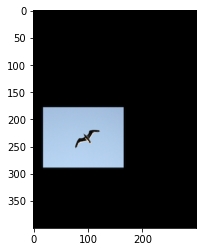

In [253]:
plt.imshow(source)

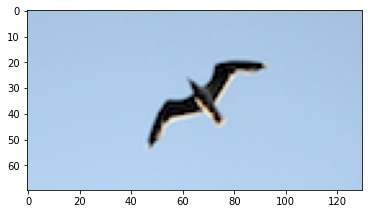

In [254]:
source = source[200:270,30:160,:]
plt.imshow(source)

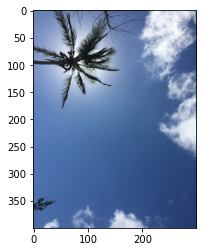

In [255]:
plt.imshow(target)

In [256]:
mask = np.ones((source.shape[0],source.shape[1]), dtype=np.uint8)
mask[:10,:] = 0
mask[-10:,:] = 0
mask[:,:10] = 0
mask[:,-10:] = 0

In [270]:
D = {}
counter = 0

offset = [210, 100]

for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i][j] == 1:
            D[(i+offset[0], j+offset[1])] = counter
            counter += 1
copy_source = np.zeros(target.shape, dtype=int)
# copy_paste[max(0, offset[0]):min(source.shape[0]+offset[0], target.shape[0]), max(0, offset[1]):min(source.shape[1]+offset[1],target.shape[1]),:]=source[max(0,-offset[0]):min(source.shape[0], target.shape[0]-offset[0]),max(0,-offset[1]):min(source.shape[1], shape[1]-offset[1]),:]

copy_source[offset[0]:source.shape[0]+offset[0],offset[1]:source.shape[1]+offset[1],:] = source[:,:,:]

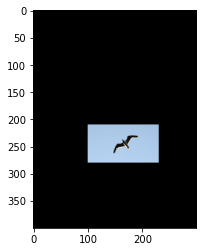

In [271]:
plt.imshow(np.uint8(copy_paste))
A = np.zeros((len(D),len(D)), dtype=int)
b = np.zeros((len(D),3), dtype=int)

In [272]:
copy_paste[offset[0],offset[1]],source[0,0]

(array([167, 195, 226], dtype=uint8), array([167, 195, 226], dtype=uint8))

In [273]:
for k, v in D.items():
        A[v][v] = 4
#         TEST = 4*target[k[0]][k[1]] - target[k[0]+1][k[1]]- target[k[0]-1][k[1]] - target[k[0]][k[1]+1] - target[k[0]][k[1]-1]
        TEST1 = 4*copy_source[k[0]][k[1]] - copy_source[k[0]+1][k[1]]- copy_source[k[0]-1][k[1]] - copy_source[k[0]][k[1]+1] - copy_source[k[0]][k[1]-1]
#         if np.mean(abs(TEST))>np.mean(abs(TEST1)):
#             A[v][v] = 4
#             b[v] += 4*target[k[0]][k[1]]
#         else:
        b[v] += TEST1   
#         zarf = 0
#         counter = 0
        if (k[0]+1, k[1]) in D: # in D means this pixel is waiting to be calculated
            A[v][D[(k[0]+1, k[1])]] = -1
#             counter += 1
        else:
            b[v] += target[k[0]+1][k[1]]
            

        if (k[0]-1, k[1]) in D:
            A[v][D[(k[0]-1, k[1])]] = -1
        else:
            b[v] += target[k[0]-1][k[1]]

        if (k[0], k[1]+1) in D:
            A[v][D[(k[0], k[1]+1)]] = -1
        else:
            b[v] += target[k[0]][k[1]+1]

        if (k[0], k[1]-1) in D:
            A[v][D[(k[0], k[1]-1)]] = -1
        else:
            b[v] += target[k[0]][k[1]-1]



x = spsolve(A, b)

for k, v in D.items():
    for i in range(3):
        if x[v][i]>255:
            target[k[0]][k[1]][i] = np.uint8(255)
        elif x[v][i]<0:
            target[k[0]][k[1]][i] = np.uint8(0)
        else:
            target[k[0]][k[1]][i] = np.uint8(round(x[v][i]))

plt.imsave("result_230.jpg", target)

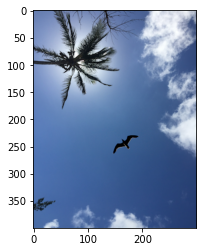

In [274]:
plt.imshow(target)